In [143]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
sns.set_style("whitegrid")

In [144]:
# Load COVID-19 data directly from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Verify data loaded
print("Data loaded successfully!")
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

Data loaded successfully!
Total rows: 429435
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hu

In [147]:
# Display first 5 rows
print(df.head())

# Check for missing data
print("\nMissing values per column:")
print(df.isnull().sum())

# Filter to key columns (simplify for beginners)
key_columns = [
    'date', 
    'location', 
    'total_cases', 
    'new_cases', 
    'total_deaths', 
    'new_deaths',
    'people_vaccinated'
]
df = df[key_columns]

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [173]:
# Select 3 example countries
countries = ["United States", "India", "Germany"]
df_filtered = df[df['location'].isin(countries)].copy()

# Convert date column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Sort by date
df_filtered = df_filtered.sort_values('date')

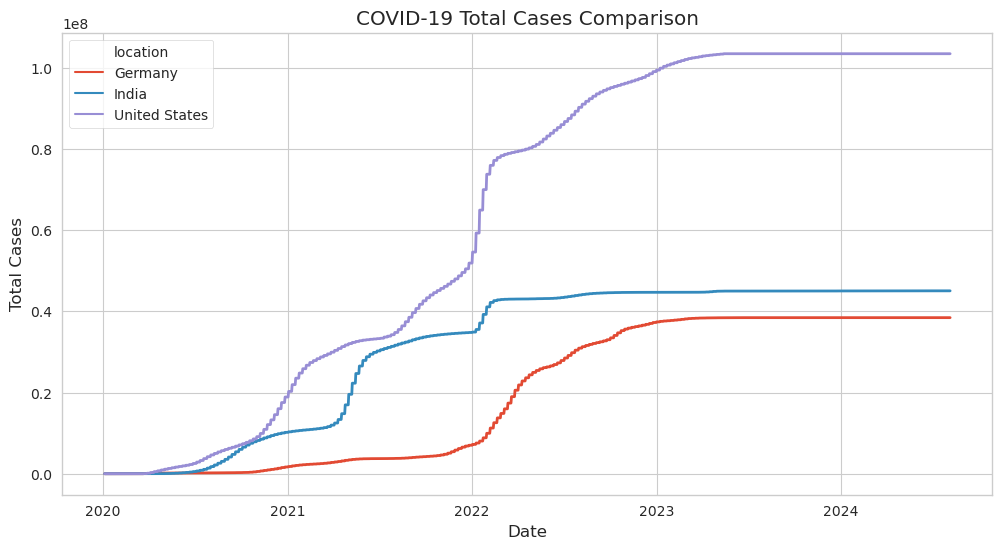

In [171]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_filtered,
    x='date',
    y='total_cases',
    hue='location',
    linewidth=2
)
plt.title("COVID-19 Total Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

/tmp/ipykernel_1746/4206014735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['new_cases_avg'] = country_data['new_cases'].rolling(7).mean()
/tmp/ipykernel_1746/4206014735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['new_cases_avg'] = country_data['new_cases'].rolling(7).mean()
/tmp/ipykernel_1746/4206014735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

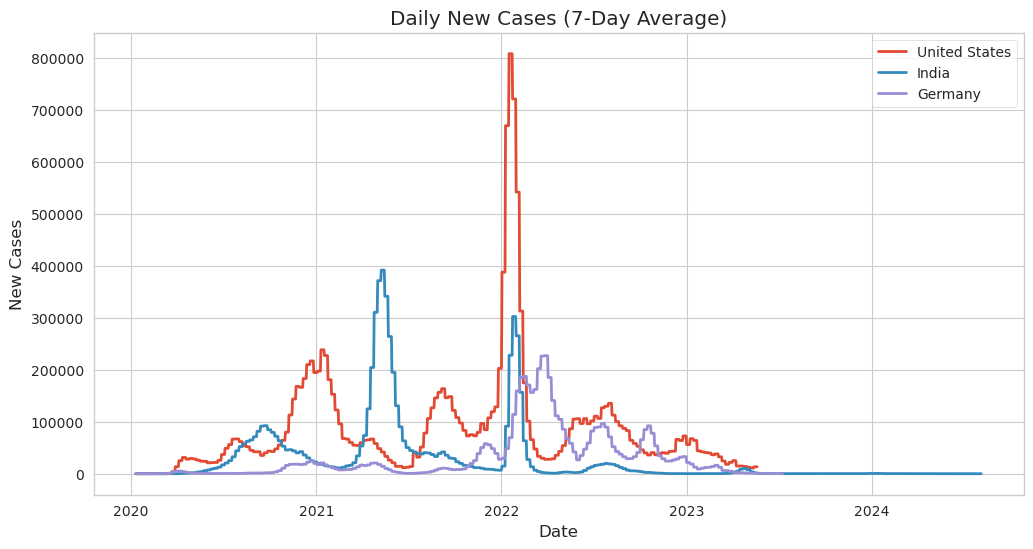

In [175]:
plt.figure(figsize=(12, 6))
for country in countries:
    # Calculate 7-day average
    country_data = df_filtered[df_filtered['location'] == country]
    country_data['new_cases_avg'] = country_data['new_cases'].rolling(7).mean()
    
    # Plot
    sns.lineplot(
        data=country_data,
        x='date',
        y='new_cases_avg',
        label=country,
        linewidth=2
    )
    
plt.title("Daily New Cases (7-Day Average)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

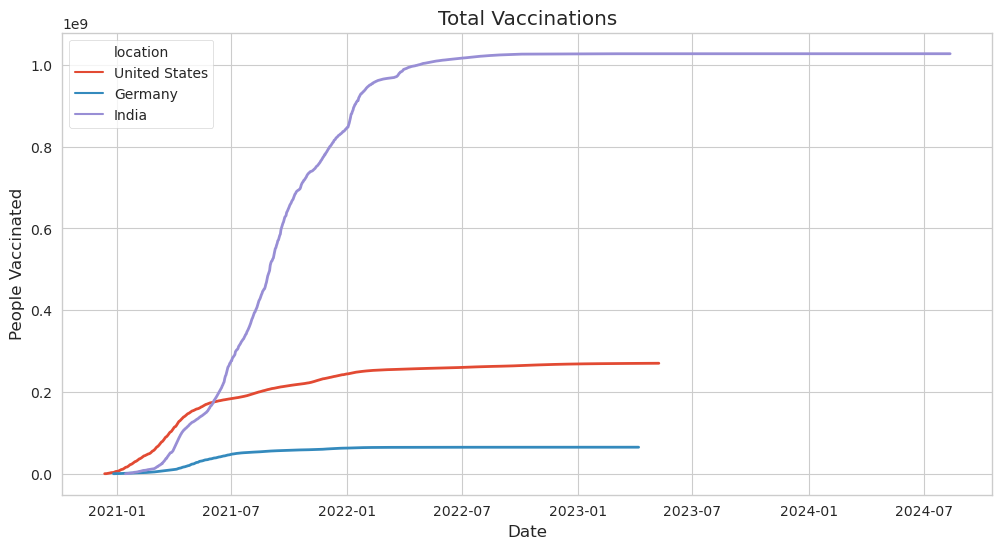

In [176]:
# Plot vaccinations (only for countries with data)
if 'people_vaccinated' in df_filtered.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_filtered.dropna(subset=['people_vaccinated']),
        x='date',
        y='people_vaccinated',
        hue='location',
        linewidth=2
    )
    plt.title("Total Vaccinations")
    plt.xlabel("Date")
    plt.ylabel("People Vaccinated")
    plt.show()
else:
    print("Vaccination data not available for selected countries")

In [177]:
# Generate a simple text summary
latest_date = df_filtered['date'].max()
summary = df_filtered[df_filtered['date'] == latest_date]

print("\nLatest Data Summary:")
print(summary[['location', 'total_cases', 'total_deaths', 'people_vaccinated']])

# Save plots instead of raw data
plt.savefig('covid_comparison.png')  # Saves the last plot shown
print("\nPlot saved as 'covid_comparison.png'")


Latest Data Summary:
       location  total_cases  total_deaths  people_vaccinated
175230    India          NaN           NaN       1.027439e+09

Plot saved as 'covid_comparison.png'


<Figure size 640x480 with 0 Axes>